# Structural keys

In [105]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [3]:
# upload varopressin dataset
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

smiles = data["Smiles"]
smiles.fillna("", inplace = True)
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
data["molecule"] = molecules

In [ ]:
# upload DrugBank-supplied molecules
supplied_moelcules = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in supplied_moelcules if m]

In [24]:
# define structural key
substructures_smarts = [Chem.MolFromSmarts("C(=O)O"),
                    Chem.MolFromSmarts("n"),
                  Chem.MolFromSmarts("CCC"),
                  Chem.MolFromSmarts("c1ccccc1"),
                  Chem.MolFromSmarts("[F,Cl,Br,I]"),
                  Chem.MolFromSmarts("[O;D2]"),
                  Chem.MolFromSmarts("S")]

In [25]:
# create structural key given a list of substructures
def filter_structural_key(molecule, keys):
    return [molecule.HasSubstructMatch(key) for key in keys]

In [26]:
# try the filter on the first dataset molecule
filter_structural_key(data.loc[0, "molecule"], substructures_smarts)

[False, False, True, True, False, True, False]

In [27]:
# filter the entire dataframe
data["structural_key"] = data["molecule"].apply(filter_structural_key, args = (substructures_smarts, ))

In [42]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,structural_key
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2247b0>,"[False, False, True, True, False, True, False]"
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2242b0>,"[False, True, True, True, False, True, False]"
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,SINGLE PROTEIN,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2246c0>,"[False, True, False, True, False, False, False]"
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d00>,"[False, False, True, True, False, True, True]"
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d50>,"[False, False, True, True, False, True, False]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,CHEMBL3342789,NaN,0,334.79,0,2.72,2a,O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1,Ki,'>',...,SINGLE PROTEIN,CHEMBL4138097,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d030>,"[False, True, False, True, True, False, True]"
1713,CHEMBL4126100,NaN,0,1139.37,None,None,dOT(L8R)ortho,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,SINGLE PROTEIN,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d080>,"[False, False, True, True, False, False, True]"
1714,CHEMBL4129142,NaN,0,1096.34,None,None,dOTmeta,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,SINGLE PROTEIN,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d0d0>,"[False, False, True, True, False, False, True]"
1715,CHEMBL419667,RELCOVAPTAN,2,620.51,1,3.30,"12, SR 49059",COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...,Ki,'=',...,SINGLE PROTEIN,CHEMBL4270673,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d120>,"[False, False, True, True, True, True, True]"


In [50]:
data["MACCSkey"] = data["molecule"].apply(MACCSkeys.GenMACCSKeys)

In [51]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,structural_key,MACCSkey
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2247b0>,"[False, False, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2242b0>,"[False, True, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2246c0>,"[False, True, False, True, False, False, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d00>,"[False, False, True, True, False, True, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d50>,"[False, False, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,CHEMBL3342789,NaN,0,334.79,0,2.72,2a,O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1,Ki,'>',...,CHEMBL4138097,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d030>,"[False, True, False, True, True, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1713,CHEMBL4126100,NaN,0,1139.37,None,None,dOT(L8R)ortho,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d080>,"[False, False, True, True, False, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1714,CHEMBL4129142,NaN,0,1096.34,None,None,dOTmeta,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,CHEMBL4118114,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d0d0>,"[False, False, True, True, False, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1715,CHEMBL419667,RELCOVAPTAN,2,620.51,1,3.30,"12, SR 49059",COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...,Ki,'=',...,CHEMBL4270673,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d120>,"[False, False, True, True, True, True, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [52]:
# explicit vs sparse bit vector
# 0, 1, 0 vs indeces of 1 (low percentage of 1)

## tanimoto coefficient, Jaccard index

In [102]:
# tanimoto coefficient for the first two molecules

maccs_bool_list_0 = list(map(bool, list(data.loc[0, "MACCSkey"])))
maccs_bool_list_1 = list(map(bool, list(data.loc[1, "MACCSkey"])))

intersection = sum([a and b for a, b in zip(maccs_bool_list_0, maccs_bool_list_1)])
union = sum([a or b for a, b in zip(maccs_bool_list_0, maccs_bool_list_1)])

print(f"{round(intersection / union, 2)}")

0.91


## Hashed fingerprints, ECFP

In [87]:
AllChem.GetMorganFingerprintAsBitVect(data.loc[0, "molecule"], 2, nBits = 1024)

In [89]:
data["morgan_fingerprint"] = data["molecule"].apply(AllChem.GetMorganFingerprintAsBitVect, args = (2, ), nBits = 1024)

In [103]:
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,structural_key,MACCSkey,morgan_fingerprint
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2247b0>,"[False, False, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2242b0>,"[False, True, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)...,Ki,'=',...,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc2246c0>,"[False, True, False, True, False, False, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C...,Ki,'=',...,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d00>,"[False, False, True, True, False, True, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,CHEMBL1085299,NaN,0,377.53,1,5.71,12k,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-...,Ki,'=',...,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc224d50>,"[False, False, True, True, False, True, False]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,CHEMBL3342789,NaN,0,334.79,0,2.72,2a,O=S(=O)(Nc1ccnn1-c1ccccn1)c1ccc(Cl)cc1,Ki,'>',...,1,Scientific Literature,Eur J Med Chem,2017.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d030>,"[False, True, False, True, True, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1713,CHEMBL4126100,NaN,0,1139.37,None,None,dOT(L8R)ortho,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d080>,"[False, False, True, True, False, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1714,CHEMBL4129142,NaN,0,1096.34,None,None,dOTmeta,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=...,Ki,'=',...,1,Scientific Literature,Bioorg Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d0d0>,"[False, False, True, True, False, False, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1715,CHEMBL419667,RELCOVAPTAN,2,620.51,1,3.30,"12, SR 49059",COc1ccc(S(=O)(=O)N2c3ccc(Cl)cc3[C@](O)(c3ccccc...,Ki,'=',...,1,Scientific Literature,J Med Chem,2018.0,None,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc9dc25d120>,"[False, False, True, True, True, True, True]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [106]:
DataStructs.FingerprintSimilarity(data.loc[0, "morgan_fingerprint"], data.loc[1, "morgan_fingerprint"])

0.7014925373134329

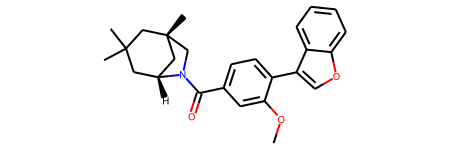

In [107]:
data.loc[0, "molecule"]

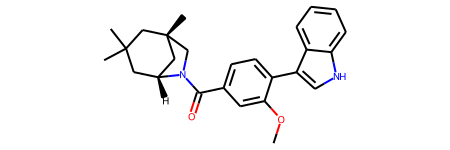

In [108]:
data.loc[1, "molecule"]